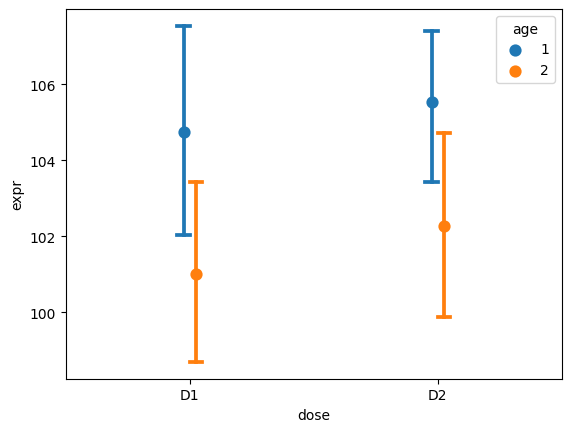

,Source,SS,DF,MS,F,p-unc,np2
0,age,197.452754,1,197.452754,7.449841,0.008313,0.110450
1,dose,16.912241,1,16.912241,0.638094,0.427552,0.010523
2,age * dose,0.927077,1,0.927077,0.034978,0.852272,0.000583
3,Residual,1590.257424,60,26.504290,NaN,NaN,NaN


In [17]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv"
athero = pd.read_csv(url)

sns.pointplot(data=athero, x='dose', y='expr', hue='age', join=False, dodge=True, capsize=0.05)
plt.show()

results = pg.anova(data=athero, dv='expr', between=['age', 'dose'])
results

### Разберем формулы "на коленке"

In [38]:
athero['expr**2']=athero['expr'].apply(lambda x:x**2)
athero.head()

,expr,age,dose,expr**2
0,107.351478,1,D1,11524.339841
1,104.504438,1,D1,10921.177590
2,103.435134,1,D1,10698.826989
3,109.572882,1,D1,12006.216490
4,114.993803,1,D1,13223.574617


In [50]:
pivot=athero.pivot_table(values='expr', columns='dose', index='age', aggfunc='sum')
display(pivot)
A1D1=pivot.loc[1,'D1']
A1D2=pivot.loc[1,'D2']
A2D1=pivot.loc[2,'D1']
A2D2=pivot.loc[2,'D2']
A1=A1D1+A1D2
A2=A2D1+A2D2
D1=A1D1+A2D1
D2=A1D2+A2D2
N=len(athero)
a=athero['age'].nunique()
d=athero['dose'].nunique()
n=N/(a+d)
const=athero['expr'].sum()**2/N

SSa=(A1**2+A2**2)/(n*a)-const
SSd=(D1**2+D2**2)/(n*d)-const
SSad=(A1D1**2+A1D2**2+A2D1**2+A2D2**2)/n-const-SSa-SSd
SSall=athero['expr**2'].sum()-const
SS=SSall-SSad-SSd-SSa

#Рассчитаем степени свободы:
DFa=a-1
DFd=d-1
DFad=DFa*DFd
DFall=N-1
DF=DFall-DFad-DFd-DFa

MSa=SSa/DFa
MSd=SSd/DFd
MSad=SSad/DFad
MS=SS/DF

#Подсчет F-критерия

Fa= MSa/MS
Fd= MSd/MS
Fad= MSad/MS

display(Fa, Fd, Fad)

dose,D1,D2
age,,
1,1676.135425,1688.733829
2,1616.076878,1636.378070


7.449841183474029

0.6380944496986383

0.03497838730434117